In [1]:
%pip install -r requirements.txt

  Using cached clip-1.0-py3-none-any.whl

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas 
from PIL import Image
full_df = pandas.read_csv('./mincult-train/train.csv', sep=';')
full_df['path'] = './mincult-train/train/'+ full_df['object_id'].astype(str) + '/' + full_df['img_name']
full_df['embedding_path'] = full_df['path']+'.embedding'
N = 100
df = full_df[:N].copy()

In [5]:
full_df['group'] = full_df['group'].replace('ДПИ',  'Декоративно-прикладное искусство')
full_df[full_df['group'] == 'ДПИ'] 

,object_id,name,description,group,img_name,path,embedding_path


In [7]:
from PIL import Image
import clip
import torch
# device = "cuda" if torch.cuda.is_available() else "cpu"
# print(f"using {device}")
# device = torch.device(device)
# model, preprocess = clip.load("ViT-L/14")
# model.to(device)

# from sentence_transformers import SentenceTransformer, util

# # We use the original clip-ViT-B-32 for encoding images
# img_model = SentenceTransformer('clip-ViT-B-32')

In [16]:
for _, row in df.iterrows(): 
    if row.name.isnan(): 
        print(row.to_dict())
    break

AttributeError: 'int' object has no attribute 'isnan'

In [54]:
import json
GEN_EMBEDDING = True
if GEN_EMBEDDING: # if we need to generate embeddings from scratch
    for index, row in df.iterrows(): 
        image = Image.open(row.path)
        image = preprocess(image).unsqueeze(0).to(device)
        with torch.no_grad():
            embedding = model.encode_image(image)[0]
        with open(row.embedding_path, 'w') as f:
            f.write(json.dumps(embedding.tolist()))
# import json
# GEN_EMBEDDING = True
# if GEN_EMBEDDING: # if we need to generate embeddings from scratch
#     for index, row in df.iterrows(): 
#         embedding = model.encode(Image.open(row.path))
#         with open(row.embedding_path, 'w') as f:
#             f.write(json.dumps(embedding.tolist()))

In [55]:
from scipy.spatial import distance

def find_best(image_path): 
    emb = model.encode([Image.open(image_path)])[0].tolist()
    distances = {} 
    for index, row in df.iterrows(): 
        with open(row.embedding_path, 'r') as f:
            other_emb = json.loads(f.readline())
            dist = distance.cosine(emb, other_emb)
            distances[index] = dist
    dists = sorted(list(distances.items()), key=lambda a: a[1])[:10] 
    for i, dist in dists: 
        print(df.loc[[i]].path)

In [56]:
find_best('sword.jpg')

Unused or unrecognized kwargs: padding.


ValueError: shapes (512,) and (768,) not aligned: 512 (dim 0) != 768 (dim 0)

In [ ]:
# import ruclip.model as ruclip_model 
# import ruclip.processor as ruclip_processor
# import ruclip.predictor as ruclip_predictor
# ru_clip_model = ruclip_model.CLIP.from_pretrained('./ruclip').eval()
# tokenizer = ruclip_processor.RuCLIPProcessor.from_pretrained('./ruclip')
# ru_predictor = ruclip_predictor.Predictor(ru_clip_model, tokenizer, device)

In [ ]:
# ru_predictor.get_text_latents('hello')

tensor([[-0.0166,  0.0004, -0.0030,  ...,  0.0460, -0.0296, -0.0237],
        [-0.0431, -0.0181, -0.0073,  ...,  0.0496, -0.0511,  0.0209],
        [-0.0248, -0.0026, -0.0176,  ...,  0.0443, -0.0488, -0.0087],
        [-0.0248, -0.0026, -0.0176,  ...,  0.0443, -0.0488, -0.0087],
        [-0.0196, -0.0098, -0.0140,  ...,  0.0447, -0.0737, -0.0166]],
       grad_fn=<DivBackward0>)

In [7]:
from sentence_transformers import SentenceTransformer, util

# We use the original clip-ViT-B-32 for encoding images
img_model = SentenceTransformer('clip-ViT-B-32')

# Our text embedding model is aligned to the img_model and maps 50+
# languages to the same vector space
text_model = SentenceTransformer('sentence-transformers/clip-ViT-B-32-multilingual-v1')

/Users/roshi/image-search/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# # Now we load and encode the images
# def load_image(url_or_path):
#     if url_or_path.startswith("http://") or url_or_path.startswith("https://"):
#         return Image.open(requests.get(url_or_path, stream=True).raw)
#     else:
#         return Image.open(url_or_path)

# # We load 3 images. You can either pass URLs or
# # a path on your disc
# img_paths = [
#     # Dog image
#     "sword.jpg",

#     # Cat image
#     "test_image.jpg",

#     # Beach image
#     "test_headphones.jpg",
# ]

# images = [load_image(img) for img in img_paths]

# # Map images to the vector space
# img_embeddings = img_model.encode(images)

# # Now we encode our text:
# texts = [
#     "high tech",
#     "weapon",  # German: A cat
#     "document"  # Spanish: a beach with palm trees
# ]

# text_embeddings = text_model.encode(texts)

# # Compute cosine similarities:
# cos_sim = util.cos_sim(text_embeddings, img_embeddings)

# for text, scores in zip(texts, cos_sim):
#     max_img_idx = torch.argmax(scores)
#     print("Text:", text)
#     print("Score:", scores[max_img_idx] )
#     print("Path:", img_paths[max_img_idx], "\n")

Unused or unrecognized kwargs: padding.


Text: high tech
Score: tensor(0.2404)
Path: test_headphones.jpg 

Text: weapon
Score: tensor(0.2538)
Path: sword.jpg 

Text: document
Score: tensor(0.2272)
Path: test_image.jpg 



In [38]:
from PIL import Image
torch.Tensor(img_model.encode([Image.open("sword.jpg")])[0])

Unused or unrecognized kwargs: padding.


tensor([ 1.5409e-01, -2.2904e-02,  6.9008e-03,  1.2680e-01,  1.6344e-02,
        -1.4147e-01, -7.7042e-02,  7.3074e-01,  1.6849e-01,  5.4354e-01,
         1.0815e-01, -5.7672e-02,  4.2591e-01, -9.4751e-02, -4.2239e-01,
        -2.6485e-01,  9.0035e-01,  1.5985e-01,  7.9928e-02, -5.4122e-01,
        -2.9139e-01,  7.8322e-01,  9.7382e-03, -1.0502e-01,  2.4995e-01,
         2.9194e-01,  1.2068e-02, -3.7704e-01, -1.5563e-01,  1.5817e-01,
         3.9409e-01, -2.3272e-02, -8.4087e-02, -4.2884e-01,  3.0473e-01,
        -2.0148e-01, -5.6921e-01, -4.3657e-01,  4.4646e-01,  6.9191e-01,
        -2.5500e-01,  1.3101e-01,  4.1107e-01, -1.1264e-01, -2.5681e-02,
        -5.5188e-01,  6.4148e-01, -9.2202e-02, -4.0493e-01, -3.2854e-02,
        -4.1640e-01, -7.8461e-02,  6.6770e-01, -3.2876e-01, -2.1588e-01,
         1.1558e-01, -4.3977e-02,  3.6046e-01,  3.2168e-02,  9.5473e-02,
         6.5722e-01, -4.0861e-01,  2.7235e-01,  2.9029e-02, -3.1615e-04,
         3.4944e-01, -3.7970e-02,  9.1480e-02,  5.9

In [27]:
import abc
import torch
class CategoryModel(abc.ABC): 
    @abc.abstractmethod
    def encode_image(self, img) -> torch.Tensor: 
        pass
    @abc.abstractmethod
    def encode_texts(self, texts) -> torch.Tensor: 
        pass 

class CategoryGetter: 
    def __init__(self, full_df, pref, model: CategoryModel): 
        self.model = model
        self.categories = full_df['group'].unique().tolist()
        self.categories.remove('Прочие')
        self.pref = pref
        self.texts = [pref+c for c in self.categories]
        self.text_features = self.model.encode_texts(self.texts)
        self.text_features /= self.text_features.norm(dim=-1, keepdim=True)

    def get_categories(self, img: str | Image.Image):
        if isinstance(img, str): 
            img = Image.open(img)
        image_features = self.model.encode_image(img)
        # Pick the top 5 most similar labels for the image
        image_features /= image_features.norm(dim=-1, keepdim=True)
        similarity = enumerate((100.0 * image_features @ self.text_features.T).softmax(dim=-1).tolist())
        # print(similarity)
        res = [[self.categories[i], conf] for i, conf in sorted(similarity, key=lambda a: a[1], reverse=True)]
        # if res[0][1] < 0.2:
        #     res[0][0] = 'Прочие'
        if res[0][0] == 'Печатная продукция': 
            res = res[1:]
        return res

In [4]:
class MultilingClipCat(CategoryModel):
    def __init__(self): 
        self.img_model = SentenceTransformer('clip-ViT-B-32')
        self.text_model = SentenceTransformer('sentence-transformers/clip-ViT-B-32-multilingual-v1')
    def encode_image(self, img): 
        return torch.Tensor(self.img_model.encode([img])[0]) 
    def encode_texts(self, texts): 
        return torch.Tensor(self.text_model.encode(texts))

In [111]:
# import numpy.linalg
# from scipy.special import softmax 
# import torch

# categories = full_df['group'].unique().tolist()
# categories.remove('Прочие')
# # categories = categories.remove('ДПИ')
# # categories.append('Декоративно-прикладное искусство')
# pref = "это музейный экспонат категории "
# texts = [pref+c for c in categories]
# text_features = torch.Tensor(text_model.encode(texts))
# text_features /= text_features.norm(dim=-1, keepdim=True)
# def get_categories(img: str | Image.Image):
#     if isinstance(img, str): 
#         img = Image.open(img)
#     # Download the dataset
#     # data_path = 'data/train.csv'
#     # image_path = 'data/3850376.jpg'


#     # Vectors creating
#     # image_input = preprocess(img).unsqueeze(0).to(device)
#     # text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in categories]).to(device)

#     image_features = torch.Tensor(img_model.encode([img])[0])
#     # dists = []
#     # for i, t in enumerate(texts): 
#     #     dists.append(distance.cosine(text_features[i], image_features))

#     # dists = {categories[i]: dist for i, dist in enumerate(dists)}
#     # best = sorted(list(dists.items()),key=lambda a: a[1])[:5]
#     # print(best)
#     # return best

#     # Pick the top 5 most similar labels for the image
#     image_features /= image_features.norm(dim=-1, keepdim=True)
#     similarity = enumerate((100.0 * image_features @ text_features.T).softmax(dim=-1).tolist())
#     # print(similarity)
#     res = [[categories[i], conf] for i, conf in sorted(similarity, key=lambda a: a[1], reverse=True)]
#     # if res[0][1] < 0.2:
#     #     res[0][0] = 'Прочие'
#     # if res[0][0] == 'Печатная продукция': 
#     #     res = res[1:]
#     return res

In [43]:
import sys, io 
def eval_model(cat_model, test_df): 
    # text_trap = io.StringIO()
    # sys.stdout = text_trap
    test_df['pred'] = test_df['path'].map(lambda path: cat_model.get_categories(path)[0])
    test_df[['group_pred', 'pred_conf']] = pandas.DataFrame(test_df['pred'].tolist(), index=test_df.index)
    # sys.stdout = sys.__stdout__
    correct = (test_df['group'] == test_df['group_pred']).sum() 
    mistakes = test_df[test_df['group'] != test_df['group_pred']]
    return mistakes

In [3]:
TEST_N = 100
model = MultilingClipCat() 
classifiers = [CategoryGetter(full_df, 'экспонат категории ', model)]
test_df = full_df.sample(TEST_N)
results = {} 
for c in classifiers: 
    mistakes = eval_model(c, test_df) 
    results[c.pref] = mistakes

NameError: name 'MultilingClipCat' is not defined

In [45]:
for pref, mistakes in results.items(): 
    print(pref)
    print((1- len(mistakes) / TEST_N))

экспонат категории 
0.31999999999999995


Text(0, 0.5, 'Кол-во ошибок на 100')

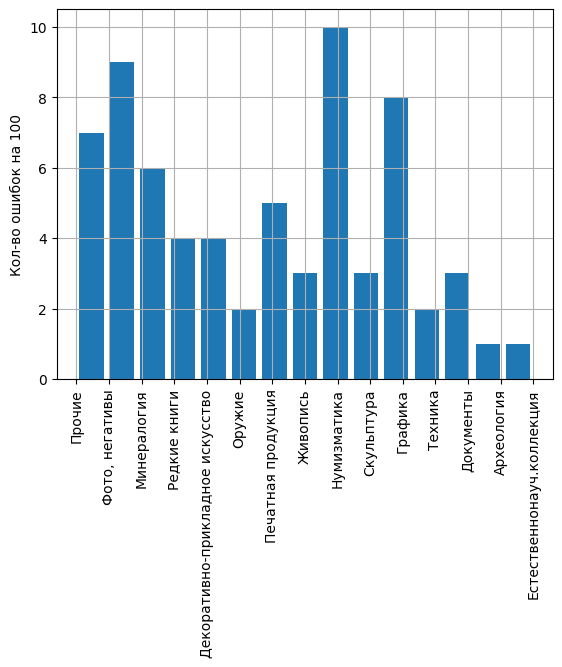

In [46]:
plt = results[classifiers[0].pref].group.hist(xrot=90, bins=15, rwidth=0.8)
plt.set_ylabel(f'Кол-во ошибок на {TEST_N}')

Text(0, 0.5, 'Кол-во ошибок на 100')

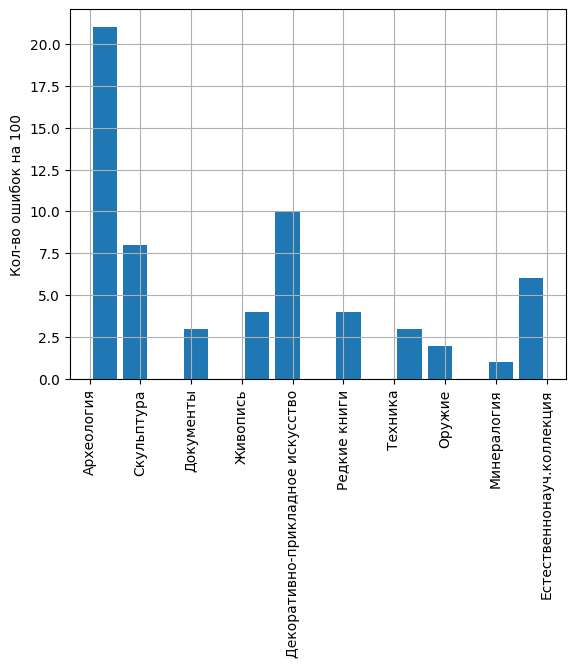

In [38]:
plt = results[classifiers[0].pref].group_pred.hist(xrot=90, bins=15, rwidth=0.8)
plt.set_ylabel(f'Кол-во ошибок на {TEST_N}')

In [47]:
results[classifiers[0].pref].head()

,object_id,name,description,group,img_name,path,embedding_path,pred,group_pred,pred_conf
16663,10778820,Клише типографское,"на тонкой металлической пластине, с вырезами п...",Прочие,8010000.jpg,./mincult-train/train/10778820/8010000.jpg,./mincult-train/train/10778820/8010000.jpg.emb...,"[Техника, 0.08880012482404709]",Техника,0.088800
2148,4337028,"Негатив. Работа гидрологов на малой лебедке ""О...",В непогоду запечатлена работа 2 гидрологов на ...,"Фото, негативы",35407104.jpg,./mincult-train/train/4337028/35407104.jpg,./mincult-train/train/4337028/35407104.jpg.emb...,"[Естественнонауч.коллекция, 0.11442886292934418]",Естественнонауч.коллекция,0.114429
18078,9622521,Антимонит,Антимонит. Радиально-лучистые сферолиты в поло...,Минералогия,6305204.jpg,./mincult-train/train/9622521/6305204.jpg,./mincult-train/train/9622521/6305204.jpg.embe...,"[Археология, 0.30742523074150085]",Археология,0.307425
5922,11784261,Л. 26 . Русский орнамент XII-XIII веков. (Из ...,NaN,Редкие книги,9359843.jpg,./mincult-train/train/11784261/9359843.jpg,./mincult-train/train/11784261/9359843.jpg.emb...,"[Декоративно-прикладное искусство, 0.104924291...",Декоративно-прикладное искусство,0.104924
10026,19939893,"Бочонок №70. Из набора игры настольной ""ЛОТО"".","Цилиндрической формы, сужающейся к основаниям....",Декоративно-прикладное искусство,51301650.jpg,./mincult-train/train/19939893/51301650.jpg,./mincult-train/train/19939893/51301650.jpg.em...,"[Археология, 0.4964650571346283]",Археология,0.496465
